### Loss function an percepton training

In [1]:
def sigmoide(u):
    g = np.exp(u)/(1 + np.exp(u))
    return g
#Aprendizaje
def Gradiente(MaxIter = 100000, eta = 0.001):
    w = np.array([30,-40,-120])#np.ones(3).reshape(3, 1)
    N = len(y2)
    Error =np.zeros(MaxIter)
    Xent = np.concatenate((X2,np.ones((100,1))),axis=1)

    for i in range(MaxIter):
        tem = np.dot(Xent,w)
        tem2 = sigmoide(tem.T)-np.array(y2)
        Error[i] = np.sum(abs(tem2))/N
        tem = np.dot(Xent.T,tem2.T)
        wsig = w - eta*tem/N
        w = wsig
    return w, Error

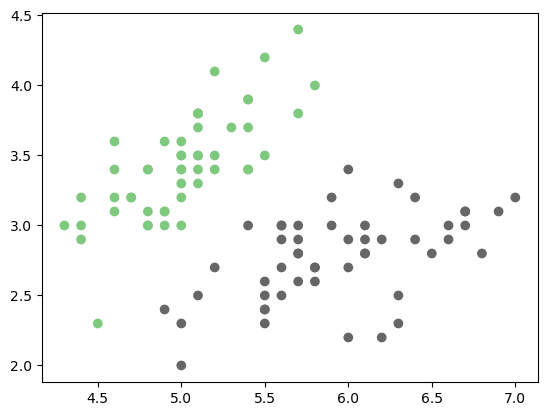

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
fig, ax = plt.subplots(1,1)
ax.scatter(X2[:,0], X2[:,1], c=y2, cmap="Accent");

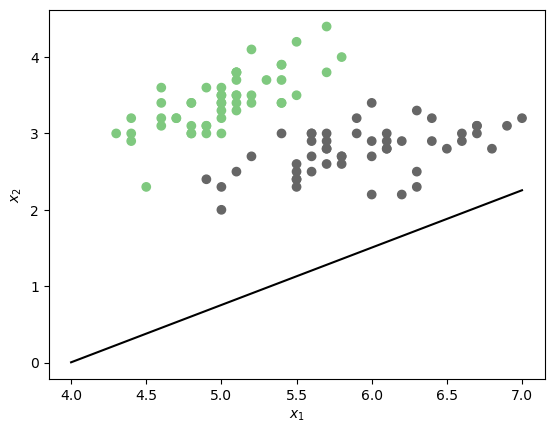

In [11]:

import time
fig, ax = plt.subplots(1,1)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X2 = X[:100][:,:2]
y2 = y[:100]
ax.scatter(X2[:,0], X2[:,1], c=y2,cmap="Accent");
w,_ = Gradiente(MaxIter = 1)
x1 = np.linspace(4,7,20)
x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
line1, = ax.plot(x1,x2,'k')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

for i in range(1,10000,100):
    w,_ = Gradiente(MaxIter = i,eta = 0.01)
    x2 = -(w[0]/w[1])*x1 - (w[2]/w[1])
    line1.set_ydata(x2)
    if i > 1000:
        ax.set_ylim([1.8,4.8])
    plt.show()
    fig.canvas.draw()
    fig.canvas.flush_events()
    time.sleep(.300)

line1, = ax.plot(x1,x2,'k')

